In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1
**Gather data, determine the method of data collection and provenance of the data** 


I am using data from https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?datasetId=727551, which dataset is from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records.  
The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.  
The current version of the dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020.  



# Step 2
**Identify an Unsupervised Learning Problem**

Refer https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records.  
This dataset contains Thirteen (13) clinical features:  
  
- age: age of the patient (years). 
- anaemia: decrease of red blood cells or hemoglobin (boolean). 
- high blood pressure: if the patient has hypertension (boolean). 
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L). 
- diabetes: if the patient has diabetes (boolean). 
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage). 
- platelets: platelets in the blood (kiloplatelets/mL). 
- sex: woman or man (binary). 
- serum creatinine: level of serum creatinine in the blood (mg/dL). 
- serum sodium: level of serum sodium in the blood (mEq/L). 
- smoking: if the patient smokes or not (boolean). 
- time: follow-up period (days). 
- [target] death event: if the patient deceased during the follow-up period (boolean). 
  
It can be used for both classification (supervised learning) and clustering (unsupervised learning), it is similar with our week2 programming assignment, that although the dataset has the target label - death event, we can apply clustering algorithm, permutate the model's labels to match original labels, and use accuracy score to measure the performance of clustering models.  
Our target - death event is a boolean variable, when fitting clustering model, as clustering model's labels (0,1,2,...) do not have real world meaning, we need to permutate to know if each label corresponds to death event 0 or 1 to maximizing performance metrics such as accuracy score.  
I will try multiple clustering models (K-Means, Agglomerative Clustering, Birch, GaussianMixture) and compare with one classification model (RandomForestClassifier). 

# Step 3
**Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data**

The dataset is first downloaded and uploaded to my github repo so I can read_csv from http link

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gt2onew/dtsa5510/main/week5/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Since this project's target is DEATH_EVENT and time captures the time at which the patient died or were censored. Using the time column as a feature is wrong, no end user will be able to provide you the value of time when using the model in real life, since it is unknown what time in the future the patient will die/get censored. As our goal is to predict to death or survival of a patient, the time should not be used as an input of the model.





In [ ]:
df.drop('time', axis=1, inplace=True)

**First let\'s visualize each single feature's data distribution**

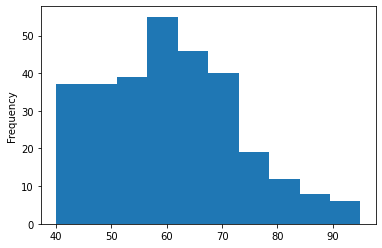

In [ ]:
df.age.plot.hist()

We can see most of samples from ages between 40 to 70

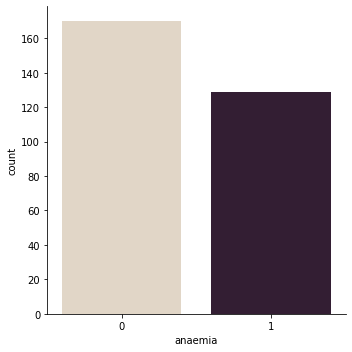

In [ ]:
sns.catplot(x="anaemia", kind="count", palette="ch:.25", data=df)


feature 'anaemia' is boolean and each class has fair amount of representation in our dataset



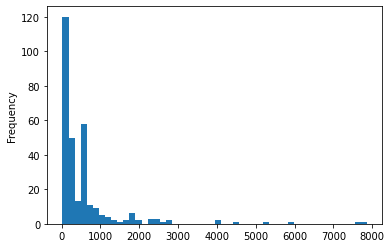

In [ ]:
df.creatinine_phosphokinase.plot.hist(bins = 50)

feature 'creatinine_phosphokinase' is not categorical and highly skewed

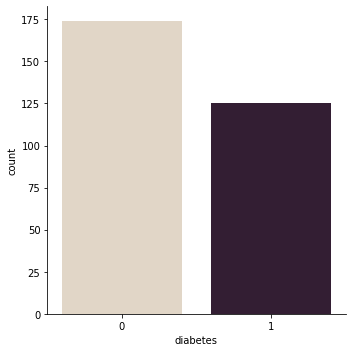

In [ ]:
sns.catplot(x="diabetes", kind="count", palette="ch:.25", data=df)


feature 'diabetes' is boolean and each class has fair amount of representation in our dataset


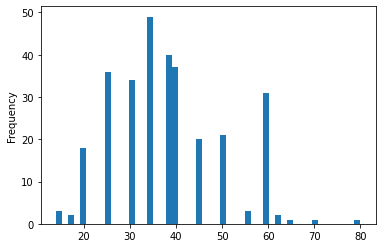

In [ ]:
df.ejection_fraction.plot.hist(bins = 50)

feature 'ejection_fraction' is not categorical and seems have low skewness

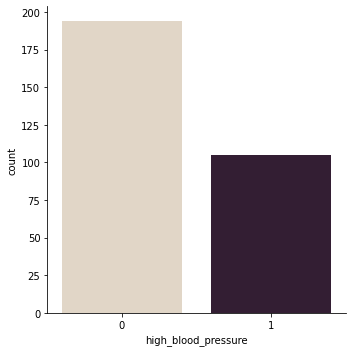

In [ ]:
sns.catplot(x="high_blood_pressure", kind="count", palette="ch:.25", data=df)


feature 'high_blood_pressure' is boolean and each class has fair amount of representation in our dataset

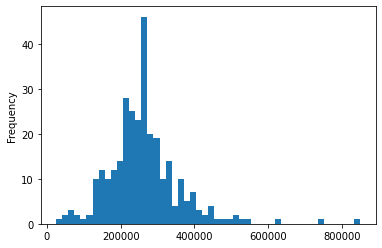

In [ ]:
df.platelets.plot.hist(bins = 50)

feature 'platelets' is numeric and continuous

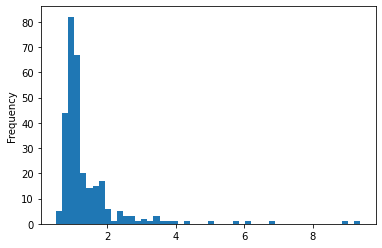

In [ ]:
df.serum_creatinine.plot.hist(bins = 50)

feature "serum_creatinine" is highly skewed

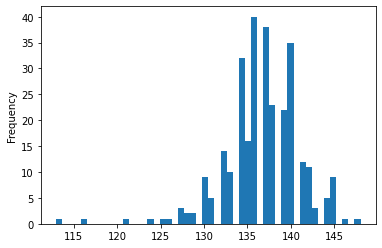

In [ ]:
df.serum_sodium.plot.hist(bins = 50)

feature 'serum_sodium' is numeric and continuous

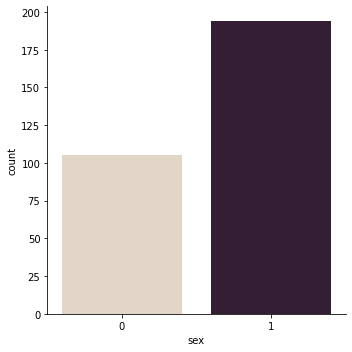

In [ ]:
sns.catplot(x="sex", kind="count", palette="ch:.25", data=df)


feature 'sex' is boolean and each class has fair amount of representation in our dataset

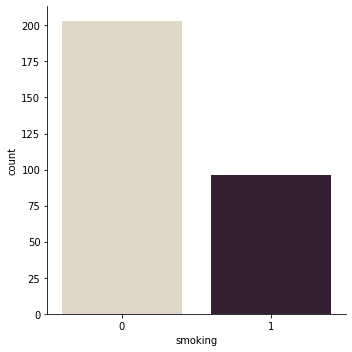

In [ ]:
sns.catplot(x="smoking", kind="count", palette="ch:.25", data=df)


feature 'smoking' is boolean and each class has fair amount of representation in our dataset

**Next lets visualize relationships between factors to determine their correlation**

**First between catogorical factor and target DEATH_EVENT**

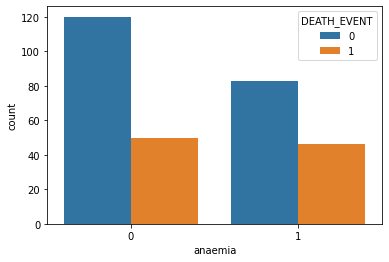

In [ ]:
sns.countplot(x = "anaemia", hue ='DEATH_EVENT', data=df)

From above plot, it seems anaemia increases the relative chance of DEATH_EVENT



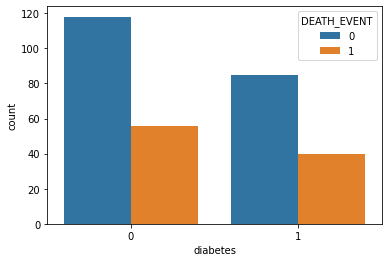

In [ ]:
sns.countplot(x = "diabetes", hue ='DEATH_EVENT', data=df)

From above plot, it does not seem to show significant impact from feature diabetes on DEATH_EVENT, later we will also check correlation matrix


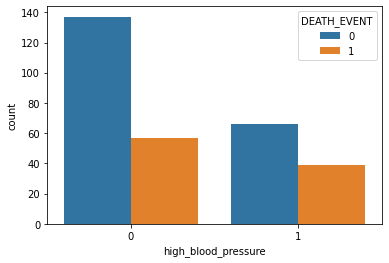

In [ ]:
sns.countplot(x = "high_blood_pressure", hue ='DEATH_EVENT', data=df)

Having high blood pressure seems increasing the relative chance of DEATH_EVENT

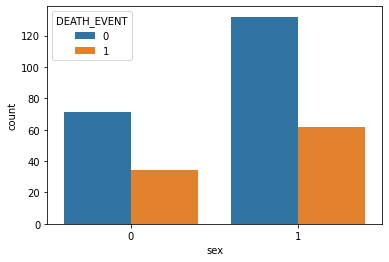

In [ ]:
sns.countplot(x = "sex", hue ='DEATH_EVENT', data=df)

From above plot, it does not seem to show significant impact from feature sex on DEATH_EVENT, later we will also check correlation matrix



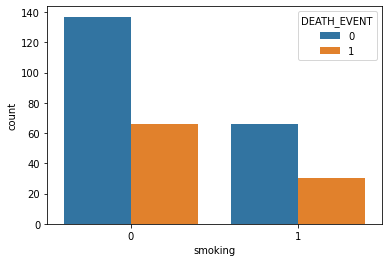

In [ ]:
sns.countplot(x = "smoking", hue ='DEATH_EVENT', data=df)

From above plot, it does not seem to show significant impact from feature smoking on DEATH_EVENT, later we will also check correlation matrix


**Next lets check other non-categorical factors**

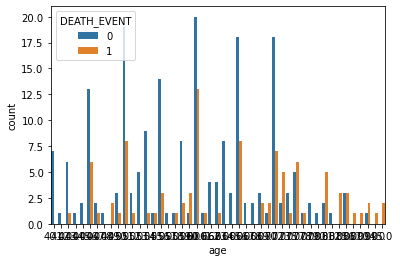

In [ ]:
sns.countplot(x = "age", hue ='DEATH_EVENT', data=df)

The spread of DEATH_EVENT is going through all ages.

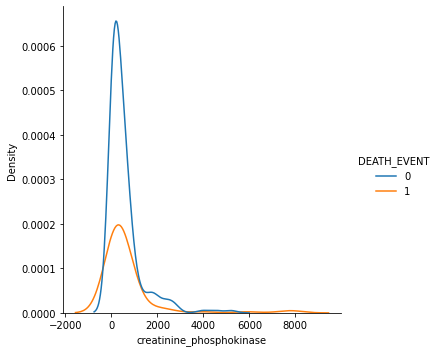

In [ ]:
sns.displot(data=df, x="creatinine_phosphokinase", hue="DEATH_EVENT", kind="kde")


feature "creatinine_phosphokinase" has significant difference on distribution between Survival and DEATH_EVENT

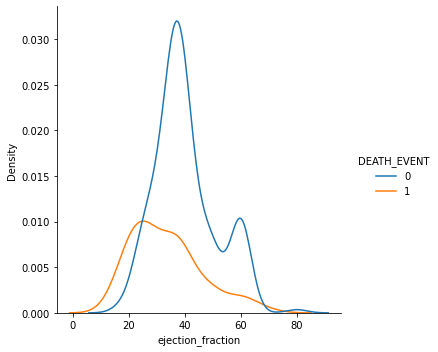

In [ ]:
sns.displot(data=df, x="ejection_fraction", hue="DEATH_EVENT", kind="kde")


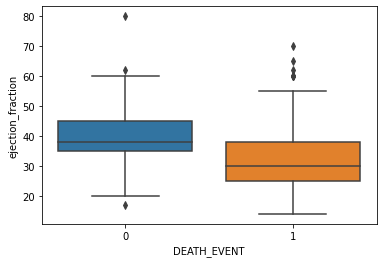

In [ ]:
sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df)

feature "ejection_fraction" has significant difference on distribution between Survival and DEATH_EVENT

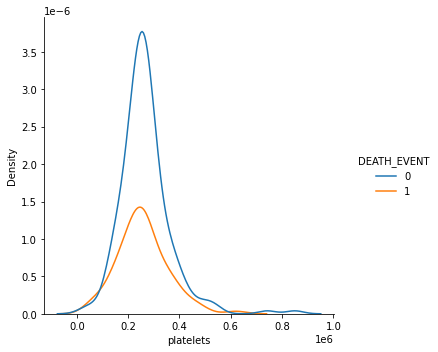

In [ ]:
sns.displot(data=df, x="platelets", hue="DEATH_EVENT", kind="kde")


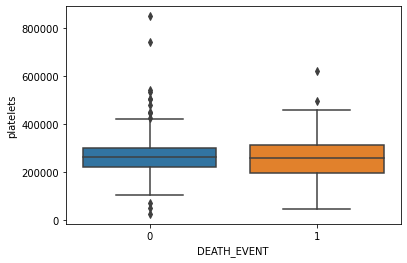

In [ ]:
sns.boxplot(x="DEATH_EVENT", y="platelets", data=df)

feature "platelets" has moderate difference on distribution between Survival and DEATH_EVENT

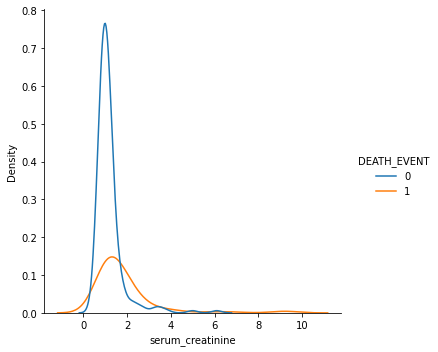

In [ ]:
sns.displot(data=df, x="serum_creatinine", hue="DEATH_EVENT", kind="kde")


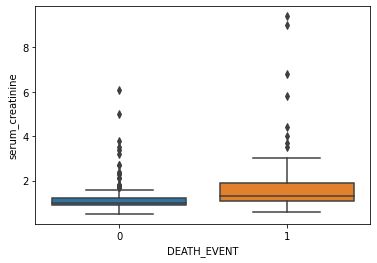

In [ ]:
sns.boxplot(x="DEATH_EVENT", y="serum_creatinine", data=df)

feature "serum_creatinine" has significant difference on distribution between Survival and DEATH_EVENT

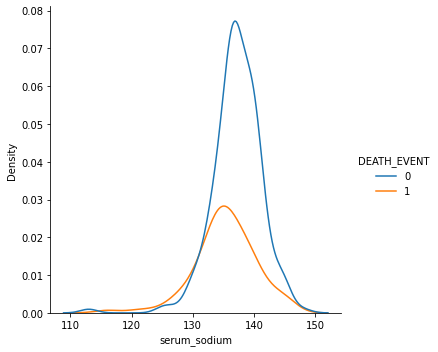

In [ ]:
sns.displot(data=df, x="serum_sodium", hue="DEATH_EVENT", kind="kde")


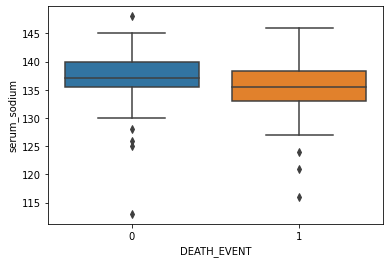

In [ ]:
sns.boxplot(x="DEATH_EVENT", y="serum_sodium", data=df)

feature "serum_sodium" has significant difference on distribution between Survival and DEATH_EVENT

**Lets also check correlation matrix**

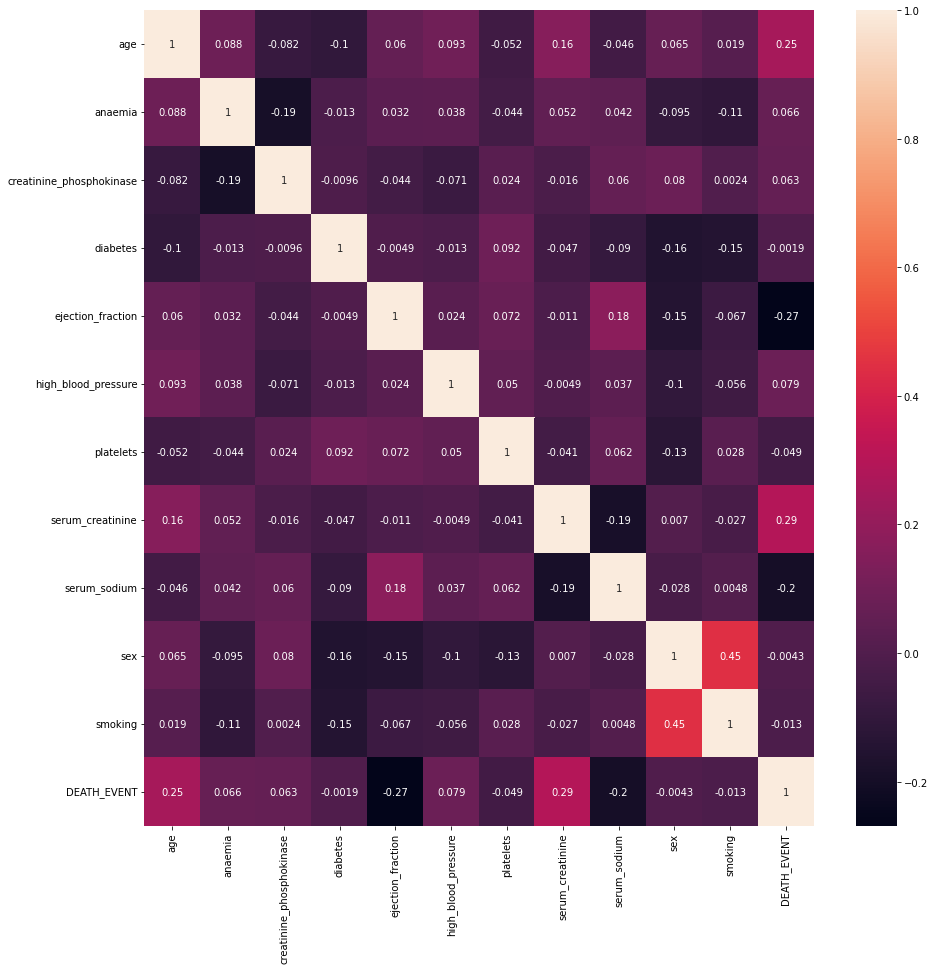

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True);

ejection_fraction, serum_creatinine are top 2 features with highest correlation with DEATH_EVENT,   
which matches the academic paper:    
Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).

**Data outlier**

**lets check boxplot on non-categorical factor**

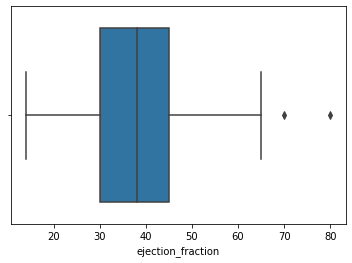

In [ ]:
sns.boxplot(x=df.ejection_fraction)

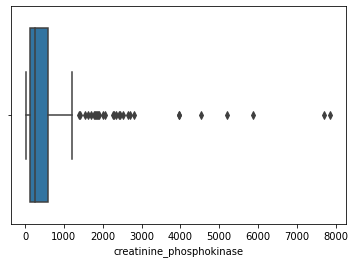

In [ ]:
sns.boxplot(x=df.creatinine_phosphokinase)

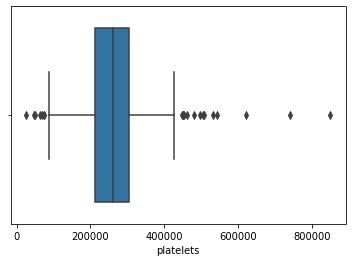

In [ ]:
sns.boxplot(x=df.platelets)

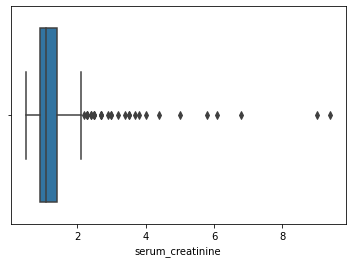

In [ ]:
sns.boxplot(x=df.serum_creatinine)

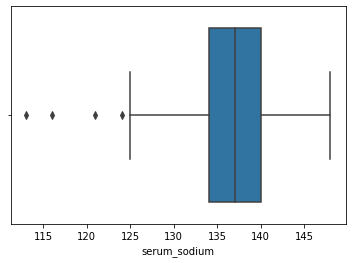

In [ ]:
sns.boxplot(x=df.serum_sodium)

At a glance, all those factors have outliers, however, before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.  
Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that exist within each feature, removing outliers becomes tricky.
For example, refer https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646, all the values in serum_creatinine falls in possible range of values. 
So they are not outliers. They are actual data points that helps in predicting DEATH_EVENT.  
Especially for machine learning in medical science, 'outliers' usually is a strong indicator highly correlated with anomaly which is very helpful for diagnosis.  
**So, we will NOT remove any 'outlier' sample.**  


**Determine if any data needs to be transformed**  
We noticed that some features are highly skewed.  

In [ ]:
from scipy.stats import skew
print(skew(df['serum_sodium']))
print(skew(df['serum_creatinine']))
print(skew(df['platelets']))
print(skew(df['creatinine_phosphokinase'])) 
print(skew(df['ejection_fraction'])) 

-1.04287046392733
4.433610162782361
1.4549745335147466
4.440688625555512
0.5525926588215331


If skewness is less than -1 or greater than 1, the distribution is highly skewed, it affects models' performance and we might end up with wrong predictions.

We will apply log-transform on features "serum_creatinine", "platelets" and creatinine_phosphokinase"

In [ ]:
df["serum_creatinine"] = np.log(df["serum_creatinine"])
df['platelets'] = np.log(df['platelets'])
df['creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'])

Also, consider the clustering models we plan to train, AgglomerativeClustering, KMeans, Birch clustering all require or will be benefited from data normalization. Gaussian Mixture Modelling does not require normalization, but will NOT be negatively impacted either. So we will also apply StandardScaler as part of data transformation.

In [ ]:
features = df.columns.tolist()
features.remove('DEATH_EVENT')

In [ ]:
features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking']

In [ ]:
scalar = StandardScaler()

In [ ]:
df[features] = scalar.fit_transform(df[features])

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,1.192945,-0.871105,0.623884,-0.847579,-1.530560,1.359272,0.192828,0.979921,-1.504036,0.735688,-0.687682,1
1,-0.491279,-0.871105,2.922432,-0.847579,-0.007077,-0.735688,0.177306,-0.228312,-0.141976,0.735688,-0.687682,1
2,0.350833,-0.871105,-0.597144,-0.847579,-1.530560,-0.735688,-1.036190,0.140991,-1.731046,0.735688,1.454161,1
3,-0.912335,1.147968,-0.839145,-0.847579,-1.530560,-0.735688,-0.388106,0.979921,0.085034,0.735688,-0.687682,1
4,0.350833,1.147968,-0.516293,1.179830,-1.530560,-0.735688,0.717841,1.756749,-4.682176,-1.359272,-0.687682,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-1.367741,1.179830,-0.007077,1.359272,-1.146500,-0.228312,1.447094,0.735688,1.454161,0
295,-0.491279,-0.871105,1.630578,-0.847579,-0.007077,-0.735688,0.239508,-0.035958,0.539054,-1.359272,-0.687682,0
296,-1.333392,-0.871105,1.739951,1.179830,1.854958,-0.735688,2.764123,-0.932311,0.312044,-1.359272,-0.687682,0
297,-1.333392,-0.871105,1.879606,-0.847579,-0.007077,-0.735688,-1.400685,0.304820,0.766064,0.735688,1.454161,0


# Step 4  
**Modelling, Tunning, Comparison**

In [ ]:
# based on previous analysis, remove low correlation features  'diabetes','sex','smoking'
features = ['age',
 'anaemia',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
]

In [ ]:
# split train and test datasets, 80% training data, 20% test data
X = df[features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# use PCA to transform data into 2-D plane for visualization to get a rough view of how the cluster looks like
from sklearn.decomposition import PCA 
pca = PCA(2) 
X_2d = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.18319596, 0.17005224])

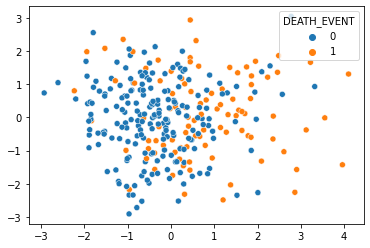

In [ ]:
sns.scatterplot(x=X_2d[:,0],y=X_2d[:,1],hue=y)


2-D Principal components can only catch around 1/3 variance and the cluster is not very obvious

**At first, without any tuning, lets check default performance of each unsupervised model**  


*   As our target DEATH_EVENT is binary, we anticipate the model to produce 2 clusters
*   Clustering model's label 0 and 1 have no real world meaning by default, we need to permutate to match it to dataset's DEATH_EVENT 0 and 1 to maximize accuracy score



In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(x_train)

In [ ]:
accuracy_score(y_train,kmeans.labels_)

0.5523012552301255

As the accuracy_score is above 0.5, we consider the model's label 0,1 matches target label 0,1

In [ ]:
accuracy_score(y_test,kmeans.predict(x_test))

0.5666666666666667

In [ ]:
# AgglomerativeClustering does not have predict function and needs to apply on entire dataset
ac_model = AgglomerativeClustering(n_clusters=2).fit(X)

In [ ]:
accuracy_score(y,ac_model.labels_)

0.43478260869565216

In [ ]:
# we need to permutate as the model's label 0,1 should match target label 1,0 here
accuracy_score(y,1 - ac_model.labels_)

0.5652173913043478

We also try another model BIRCH clustering https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch which is not covered in our course.  
Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible.  

In [ ]:
brc = Birch(n_clusters=2).fit(x_train)

In [ ]:
accuracy_score(y_train,brc.labels_)

0.5732217573221757

In [ ]:
accuracy_score(y_test,brc.predict(x_test))

0.5333333333333333

Another clustering model we will try is Gaussian Mixture Models. It can address one drawback of k means clustering - all the clusters created have a circular shape. This is because the centroids of the clusters are updated iteratively using the mean value.Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.  
Reference : https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

In [ ]:
gm = GaussianMixture(n_components=2,init_params='random').fit(x_train)

In [ ]:
accuracy_score(y_train,gm.predict(x_train))

0.7196652719665272

In [ ]:
accuracy_score(y_test,gm.predict(x_test))


0.6333333333333333

For comparison, we use one of the supervised classification model learned in DTSA-5509 - RandomForestClassifier

In [ ]:
r_clf = RandomForestClassifier(random_state=42)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
accuracy_score(y_test, r_pred)

0.65

**Next, we will try to tune each model with different hyperparameters for better performance (accuracy)**

In [ ]:
max_acc = 0
best_algorithm = None
best_tol = None
algorithms = ['auto','elkan']
tols = [0.00001,0.0001,0.01,0.1]
for algorithm in algorithms:
  for tol in tols:
    kmeans = KMeans(n_clusters=2, algorithm=algorithm, tol=tol,random_state=42).fit(x_train)
    acc = max(accuracy_score(y_test,kmeans.predict(x_test)), accuracy_score(y_test,1-kmeans.predict(x_test)))
    if acc > max_acc:
      max_acc = acc
      best_algorithm = algorithm
      best_tol = tol
print("max_acc : ",max_acc)
print("best_algorithm : ",best_algorithm)
print("best_tol : ",best_tol)

max_acc :  0.5666666666666667
best_algorithm :  auto
best_tol :  1e-05


In [ ]:
max_acc = 0
best_affinity = None
best_linkage = None
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
for linkage in linkages:
  for affinity in affinities:
    if linkage == 'ward' and affinity != 'enclidean':
      continue
    ac_model = AgglomerativeClustering(n_clusters=2, linkage = linkage, affinity = affinity).fit(X)
    acc = accuracy_score(y,ac_model.labels_)
    if acc > max_acc:
      max_acc = acc
      best_affinity = affinity
      best_linkage = linkage
print("max_acc : ",max_acc)
print("best_affinity : ",best_affinity)
print("best_linkage : ",best_linkage)

max_acc :  0.68561872909699
best_affinity :  euclidean
best_linkage :  average


For Birch clustering:  

threshold float, default=0.5
The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

branching_factor int, default=50
Maximum number of CF subclusters in each node. If a new samples enters such that the number of subclusters exceed the branching_factor then that node is split into two nodes with the subclusters redistributed in each. The parent subcluster of that node is removed and two new subclusters are added as parents of the 2 split nodes.

In [ ]:
max_acc = 0
best_threshold = None
best_branching_factor = None
thresholds = [0.5,1,2,5]
branching_factors = [5,10,20,50]
for threshold in thresholds:
  for branching_factor in branching_factors:
    brc = Birch(n_clusters=2,threshold=threshold,branching_factor=branching_factor).fit(x_train)
    acc = max(accuracy_score(y_test,brc.predict(x_test)), accuracy_score(y_test,1-brc.predict(x_test)))
    if acc > max_acc:
      max_acc = acc
      best_threshold = threshold
      best_branching_factor = branching_factor
print("max_acc : ",max_acc)
print("best_threshold : ",best_threshold)
print("best_branching_factor : ",best_branching_factor)

max_acc :  0.6833333333333333
best_threshold :  1
best_branching_factor :  10


For GaussianMixture:  
covariance_type  {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
String describing the type of covariance parameters to use. Must be one of:

‘full’: each component has its own general covariance matrix.

‘tied’: all components share the same general covariance matrix.

‘diag’: each component has its own diagonal covariance matrix.

‘spherical’: each component has its own single variance.

tol  float, default=1e-3
The convergence threshold. EM iterations will stop when the lower bound average gain is below this threshold.

In [ ]:
max_acc = 0
best_covariance_type = None
best_tol = None
covariance_types = ['full', 'tied', 'diag', 'spherical']
tols = [0.00001,0.0001,0.01,0.1]
for covariance_type in covariance_types:
  for tol in tols:
    gm = GaussianMixture(n_components=2,init_params='random',covariance_type=covariance_type,tol=tol).fit(x_train)
    acc = max(accuracy_score(y_test,gm.predict(x_test)), accuracy_score(y_test,1-gm.predict(x_test)))
    if acc > max_acc:
      max_acc = acc
      best_tol = tol
      best_covariance_type = covariance_type
print("max_acc : ",max_acc)
print("best_tol : ",best_tol)
print("best_covariance_type : ",best_covariance_type)

max_acc :  0.6666666666666666
best_tol :  0.1
best_covariance_type :  diag


In [ ]:
max_acc = 0
best_criterion = None
best_max_depth = None
best_max_feature = None
best_bootstrap = None
best_ccp_alpha = None
criterions = ['gini', 'entropy']
max_depths = [5,10,20,None]
max_features = ['sqrt', 'log2', None]
bootstraps = [True, False]
ccp_alphas = [0.0, 0.001, 0.01]

for criterion in criterions:
  for max_depth in max_depths:
    for max_feature in max_features:
      for bootstrap in bootstraps:
        for ccp_alpha in ccp_alphas:
          r_clf = RandomForestClassifier(criterion=criterion,max_depth=max_depth,max_features=max_feature,bootstrap=bootstrap,ccp_alpha=ccp_alpha,random_state=42)
          r_clf.fit(x_train, y_train)
          r_pred = r_clf.predict(x_test)
          acc = accuracy_score(y_test, r_pred)
          if acc > max_acc:
            max_acc = acc
            best_criterion = criterion
            best_max_depth = max_depth
            best_max_feature = max_feature
            best_bootstrap =  bootstrap
            best_ccp_alpha = ccp_alpha
print("max_acc : ",max_acc)
print("best_criterion : ",best_criterion)
print("best_max_depth : ",best_max_depth)
print("best_max_feature : ",best_max_feature)
print("best_bootstrap : ",best_bootstrap)
print("best_ccp_alpha : ",best_ccp_alpha)

max_acc :  0.7333333333333333
best_criterion :  gini
best_max_depth :  5
best_max_feature :  None
best_bootstrap :  False
best_ccp_alpha :  0.01


**Summarize each model's best score and analyze**

In [ ]:
d = {
    'model' : ['KMeans','Agglomerative','Birch','GaussianMixture','RandomForest'],
    'score' : [0.57, 0.69, 0.68, 0.67, 0.73]
     }
df_summary = pd.DataFrame(d)
df_summary

,model,score
0,KMeans,0.57
1,Agglomerative,0.69
2,Birch,0.68
3,GaussianMixture,0.67
4,RandomForest,0.73




*   Based on research on kagggle and UCL datasets, it is often to find out a dedicated dataset for clustering problem, and we have to use classification dataset for clustering modelling and permutate labels to calculate metrics so we can evaluate the performance of clustering models. So for this kind of usage, in most time, inevitably classification models perform better. 
*   Gaussian Mixture model performs better and as mentioned earlier, it addressed one drawback of kmeans about cluster's distribution, we can see significant improvement compared with KMeans' model
*   Agglomerative clustering performs better than KMeans for high dimension datasets, KMeans usually performs well on 1,2,3D dimensions' data
*   Agglomerative clustering is sensitive to outliers, in our dataset, those non-categorical features do have considerable amounts of outliers from statistical standpoint, however we explained that from medical reserch, those samples are valuable and should not be removed
*   BIRCH, similar with Agglomerative clustering, is a balanced iterative hierarchical based clustering in which is used to divide a large data in small clusters. 
*   An advantage of BIRCH is its ability to incrementally and dynamically cluster incoming, multi-dimensional metric data points to produce the best quality clustering for a given set of resources (memory and time constraints). In most cases, BIRCH only requires a single scan of the database. Our dataset here is very small containing only 299 samples, so that such advantage cannot be illustrated clearly.

